# Case Studies 2:- Analyzing Gun Deaths in the USA between 2012-2014

**Introduction**

*  This study analyzes gun deaths in the United States of Anerica between 2012 & 2014

**Data Gathering**

It's important to gather a study's dataset from a reliable source it's also important to use an updated and accurate data set to get unbiased findings.

The dataset in this case study comes from open data from U.S government which can be accesssed through https://github.com/

 You can download it from here:-https://github.com/fivethirtyeight/guns-data/blob/master/full_data.csv

This case study will try to answer the follwing question:-
   
   *  What is the number of annual suicide gun deaths in the United States from 2012 to 2014,by genders??

   * What is the number of gun deaths by race in the United States per 100,000 people from 2012 to 2014??

   * What is annual number of gun deaths in the United States on average from 2012 to 2014,by cause??

   * What is percentage per 100,000 people of annual gun deaths in the United States from 2012 to 2014,by cause??

   * What is percentage of annual suicide gun deaths in the United States from 2012 to 2014,by year??


*Installing Libraries*

In [1]:
from pickle import TRUE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white',color_codes=True)
import warnings
warnings.filterwarnings("ignore")

*Reading CSV*

In [2]:
data = pd.read_csv("/content/full_data.csv",index_col=0)
data.index.name="Index"
data.columns=map(str.capitalize,data.columns)
data

,Year,Month,Intent,Police,Sex,Age,Race,Hispanic,Place,Education
Index,,,,,,,,,,
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED
...,...,...,...,...,...,...,...,...,...,...
100794,2014,12,Homicide,0,M,36.0,Black,100,Home,HS/GED
100795,2014,12,Homicide,0,M,19.0,Black,100,Street,HS/GED
100796,2014,12,Homicide,0,M,20.0,Black,100,Street,HS/GED


*Checking Dtypes of columns*

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100798 entries, 1 to 100798
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Year       100798 non-null  int64  
 1   Month      100798 non-null  int64  
 2   Intent     100797 non-null  object 
 3   Police     100798 non-null  int64  
 4   Sex        100798 non-null  object 
 5   Age        100780 non-null  float64
 6   Race       100798 non-null  object 
 7   Hispanic   100798 non-null  int64  
 8   Place      99414 non-null   object 
 9   Education  99376 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 8.5+ MB


*Total Rows & Columns in datasets*

In [4]:
print("Total Rows in dataset---->",data.shape[0])
print("Total Columns in dataset---->",data.shape[1])

Total Rows in dataset----> 100798
Total Columns in dataset----> 10


*Checking the NaN values*

In [5]:
data.isna().sum()

Year            0
Month           0
Intent          1
Police          0
Sex             0
Age            18
Race            0
Hispanic        0
Place        1384
Education    1422
dtype: int64

**Data Analysis**

Now let's look at the data and make some analysis......

*Organize the dataset by year and then by month*

In [6]:
data.sort_values(['Year','Month'],inplace = True)
data

,Year,Month,Intent,Police,Sex,Age,Race,Hispanic,Place,Education
Index,,,,,,,,,,
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
12,2012,1,Suicide,0,M,21.0,Native American/Native Alaskan,100,Home,HS/GED
135,2012,1,Suicide,0,F,59.0,White,100,Home,HS/GED
...,...,...,...,...,...,...,...,...,...,...
100793,2014,12,Homicide,0,M,31.0,Black,100,Other specified,HS/GED
100794,2014,12,Homicide,0,M,36.0,Black,100,Home,HS/GED
100795,2014,12,Homicide,0,M,19.0,Black,100,Street,HS/GED


*  How many Males & Females are included in this study??

In [7]:
dataset_gun = data
dataset_gun.Sex.value_counts(normalize=False)

M    86349
F    14449
Name: Sex, dtype: int64

As shown here there are 14,449 educated females involved in this study.

*Group the dataset by Genders*

In [8]:
dataset_bygender = dataset_gun.groupby("Sex").count()
dataset_bygender

,Year,Month,Intent,Police,Age,Race,Hispanic,Place,Education
Sex,,,,,,,,,
F,14449,14449,14449,14449,14446,14449,14449,14386,14243
M,86349,86349,86348,86349,86334,86349,86349,85028,85133


**Data Visualization**

In this case study,We will try to find the answer to the numerous question posed earlier

Let's get started

*  What is the number od suicide gun deaths in the United States from 2012 to 2014,by gender??

    *  Gun Death by Gender

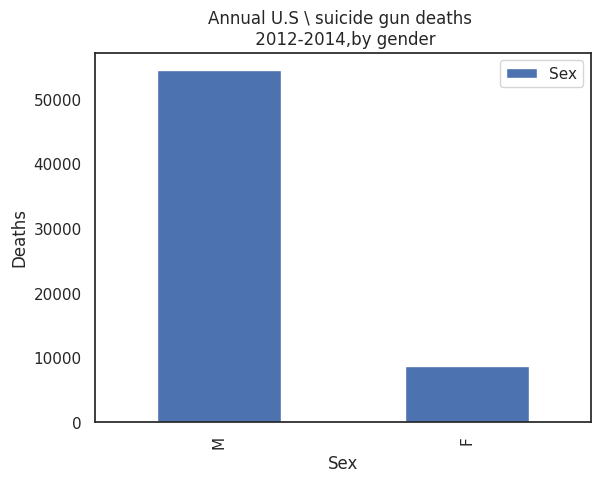

In [9]:
data_suicide_gender =dataset_gun[dataset_gun["Intent"]=="Suicide"]
data_suicide_gender.Sex.value_counts(normalize=False).plot.bar(title="Annual U.S \\ suicide gun deaths \n 2012-2014,by gender")
plt.xlabel("Sex")
plt.ylabel("Deaths")
plt.legend()

*   Ans---> It's clear that there are huge difference between males & females.

    The number of male suicide by gun is above 50,000 while the females death rate is below 10,000,which shows how males are more likely to commit suicide using a gun

Text(0, 0.5, 'Deaths')

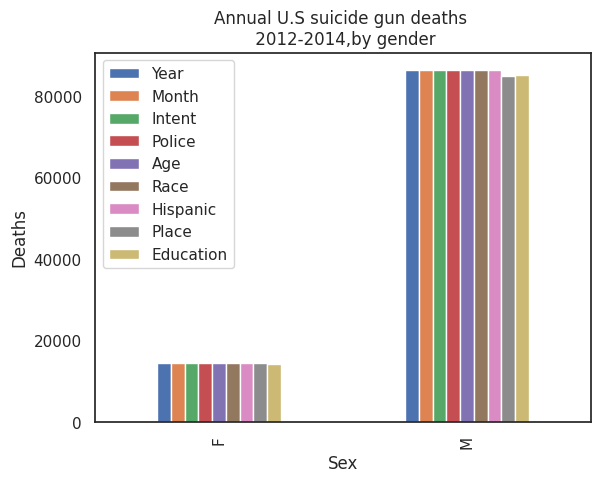

In [13]:
dataset_bygender.plot.bar(title="Annual U.S suicide gun deaths \n 2012-2014,by gender")
plt.ylabel("Deaths")

*Visualizing Gun Deaths by Year*

In [22]:
data_suicide=data[data["Intent"]=="Suicide"]
data_suicide=data_suicide.Year.value_counts(ascending=False)*100/10000
data_suicide.sort_values(ascending=True)

2012    206.66
2013    211.75
2014    213.34
Name: Year, dtype: float64

Text(0.5, 0, 'Year')

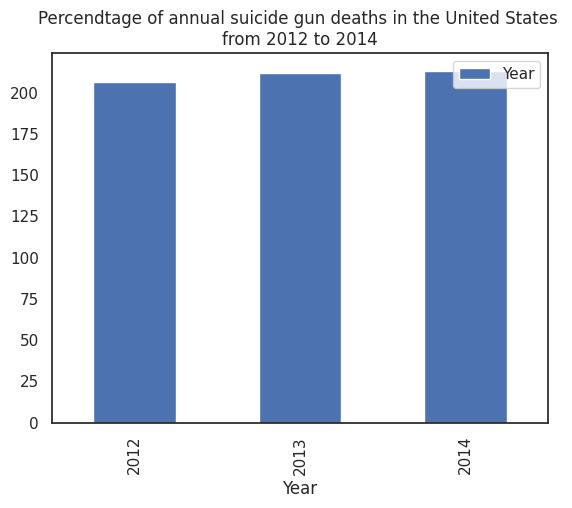

In [25]:
data_suicide.sort_values(ascending=True).plot.bar(title='Percendtage of annual suicide gun deaths in the United States \nfrom 2012 to 2014')
plt.legend()
plt.xlabel('Year')

*  The figure shows almost the same number of sucide each year over three years,which means that this is a regular patterns

*Case study 2:- Findings*

Investigation Question

1. What is the number of U.S. suicide gun deaths from 2012 to 2014, by gender?

2. What is the number of gun deaths in the United States per a 100,000 population from 2012 to 2014?

3. What are the annual number of gun deaths in the United States on average from 2012 to 2014, by cause?

4. What is the 100,000 percentage of annual guns death tolls in the United States from 2012 to 2014, by cause?

5. What is the percentage of annual suicide gun deaths in the United States from 2012 to 2014, by year?

Findings

*  Male suicide gun deaths is over 50,000, while females suicide gun deaths is below 10,000, which shows how males are more likely to commit suicide with a gun.

* The highest number of deaths is for while people, then black, and then Hispanic.

* There is a high number of suicide and homicide deaths compared to a low number of deaths due to accidents.

*  The 100,000 percentages shows that there are 60 suicide cases for every 100,000 people, which somehow is not a high rate. In addition, there are 30 homicide cases for every 100,000 people,

* The analysis shows almost the same number of suicides each year over a period of three years, which means that this is a regular pattern in society.

THANK YOU!!! 😀